# Forest Fire Prediction Model - Temperature Analysis
This notebook analyzes temperature-based features for forest fire prediction using Random Forest algorithm.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [3]:
# Load the dataset
df = pd.read_csv('Data/Temp/Algerian_forest_fires_dataset_CLEANED.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,1


In [6]:
# Data Analysis
print('Dataset Shape:', df.shape)
print('\nDataset Info:')
df.info()
print('\nMissing Values:')
print(df.isnull().sum())

# Display unique values in each column
print('\nUnique values in each column:')
for column in df.columns:
    print(f"\n{column}:", df[column].unique())

Dataset Shape: (243, 15)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB

Missing Values:
day            0
month          0
year           0
Temperatur

In [18]:
# Convert categorical variables to numeric
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns found:", categorical_columns)

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col}")

print("\nDataset after encoding:")
print(df.head())

Categorical columns found: Index(['Classes'], dtype='object')
Encoded Classes

Dataset after encoding:
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes  Region  
0  0.5        1       1  
1  0.4        1       1  
2  0.1        1       1  
3  0.0        1       1  
4  0.5        1       1  


In [19]:
# Prepare features and target
# Assuming 'Classes' is your target column - adjust if different
X = df.drop('Classes', axis=1)  
y = df['Classes']

print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Features (X):
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Region  
0  0.5       1  
1  0.4       1  
2  0.1       1  
3  0.0       1  
4  0.5       1  

Target (y):
0    1
1    1
2    1
3    1
4    1
Name: Classes, dtype: int64

Training set shape: (194, 14)
Testing set shape: (49, 14)


In [20]:
# Train Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)

print("Training the model...")
rf_model.fit(X_train, y_train)
print("Model training completed!")

Training the model...
Model training completed!


In [21]:
# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Model Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Model Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        22

    accuracy                           0.98        49
   macro avg       0.98      0.98      0.98        49
weighted avg       0.98      0.98      0.98        49



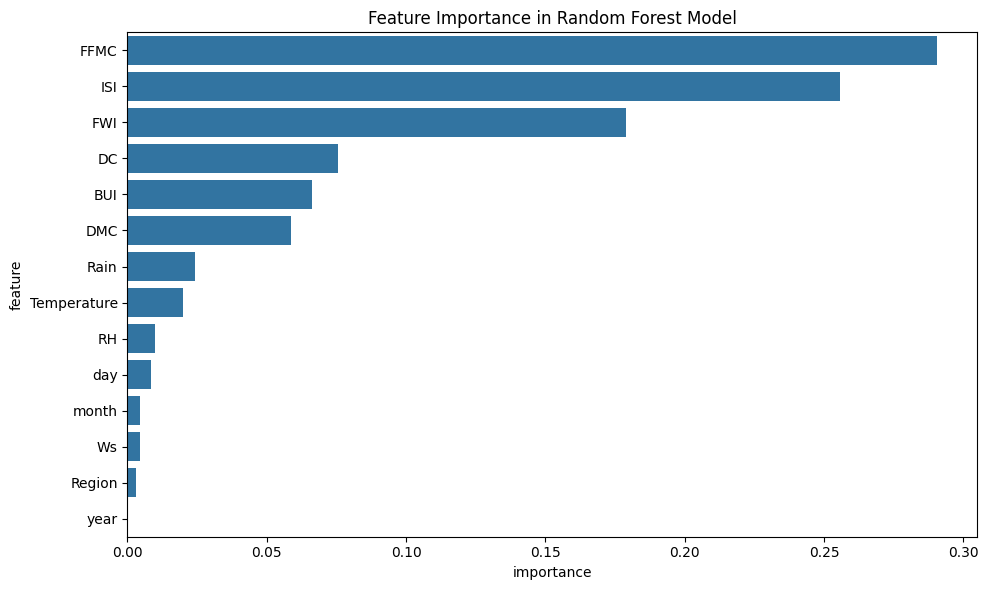


Feature Importance Scores:
        feature  importance
7          FFMC    0.290440
10          ISI    0.255735
12          FWI    0.178756
9            DC    0.075534
11          BUI    0.066115
8           DMC    0.058658
6          Rain    0.024166
3   Temperature    0.019925
4            RH    0.009725
0           day    0.008629
1         month    0.004646
5            Ws    0.004434
13       Region    0.003236
2          year    0.000000


In [22]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

print("\nFeature Importance Scores:")
print(feature_importance)

In [23]:
# Save the model
joblib.dump(rf_model, 'temp.joblib')
print('Model saved as temp.joblib')

# Verify the model was saved
import os
if os.path.exists('temp.joblib'):
    print("Model file size:", os.path.getsize('temp.joblib'), "bytes")

Model saved as temp.joblib
Model file size: 156265 bytes
